In [1]:
!pip install numpy pandas matplotlib seaborn wordcloud nltk


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 503.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -------- ------------------------------- 61.4/301.4 kB 1.7 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/301.4 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.4 kB 1.6 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 1.7 MB/s eta 0:00:01
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
columns = [ 'Movie_Name' , 'Genre' , 'Description']
column = ['Movie_Name' , 'Description']

In [34]:
df_train = pd.read_csv("train_data.txt", delimiter=':::'  ,engine="python", names=columns , index_col=0 )

# DISPLAY THE FIRST FEW ROWS OF THE TEST DATASET
df_train.head()

,Movie_Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [35]:
df_test = pd.read_csv("test_data_solution.txt", delimiter=':::' , engine='python' , names=columns , index_col=0 )

# DISPLAY THE FIRST FEW ROWS OF THE TEST DATASET
df_test.head()

,Movie_Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [36]:
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()

In [37]:
df_train.drop(columns=['Movie_Name'], inplace = True)
df_test.drop(columns=['Movie_Name'], inplace = True)

In [38]:
df_train.head()

,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [39]:
df_test.head()

,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


In [40]:
print("TRAINING DUPLICATES:", df_train.duplicated().sum())

TRAINING DUPLICATES: 110


In [41]:
print("TEST DUPLICATES:", df_test.duplicated().sum())

TEST DUPLICATES: 114


In [42]:
df_train = df_train.drop_duplicates(keep ='first')

In [43]:
df_test = df_test.drop_duplicates(keep = 'first')

In [44]:
print("TRAINING DUPLICATES AFTER REMOVAL:", df_train.duplicated().sum())

# VERIFY NO DUPLICATES REMAIN IN THE TEST DATASET
print("TEST DUPLICATES AFTER REMOVAL:", df_test.duplicated().sum())

TRAINING DUPLICATES AFTER REMOVAL: 0
TEST DUPLICATES AFTER REMOVAL: 0


In [45]:
x_train_full = df_train['Description']
y_train_full = df_train['Genre']

x_test = df_test['Description']
y_test = df_test['Genre']

In [46]:
print(x_train_full.shape)
print(y_train_full.shape)

(54104,)
(54104,)


C:\Users\rahul\AppData\Local\Temp\ipykernel_11008\1501153204.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')


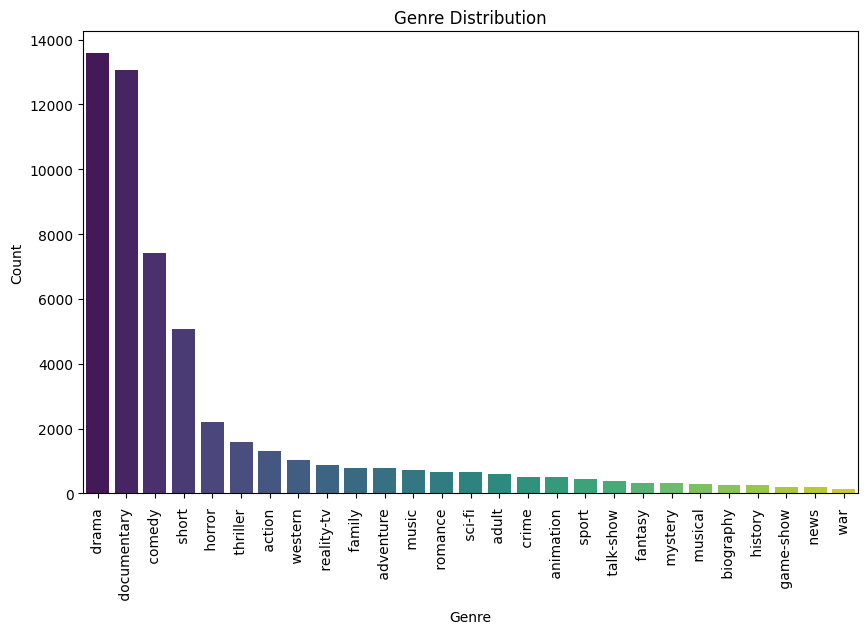

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

# SPLIT THE TRAINING DATA INTO TRAINING AND VALIDATION SETS
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# INITIALIZE TF-IDF VECTORIZER
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

# FIT AND TRANSFORM THE TRAINING FEATURES, AND TRANSFORM THE VALIDATION AND TEST FEATURES
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

In [50]:
from sklearn.naive_bayes import MultinomialNB

# TRAIN THE MULTINOMIAL NAIVE BAYES CLASSIFIER
nb = MultinomialNB()
nb.fit(X_train_vec, Y_train)

MultinomialNB()

In [52]:
y_pred_val = nb.predict(X_val_vec)
y_pred_val

array([' comedy ', ' comedy ', ' documentary ', ..., ' drama ',
       ' documentary ', ' drama '], dtype='<U13')

In [53]:
from sklearn.metrics import accuracy_score, classification_report

# EVALUATE THE MODEL ON THE VALIDATION SET
accuracy_val = accuracy_score(Y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)
print("Validation Classification Report:")
print(classification_report(Y_val, y_pred_val, zero_division=0))

Validation Accuracy: 0.5258294057850476
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.50      0.06      0.11       271
       adult        0.50      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.44      0.47      1445
       crime        0.00      0.00      0.00        88
 documentary        0.59      0.89      0.71      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.71      0.34      0.46       429
       music        0.93      0.09      0.17       148
     musical        0.00      0.00      0.00 

In [54]:
y_pred_test = nb.predict(X_test_vec)

# EVALUATE THE MODEL ON THE TEST SET
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Test Accuracy: 0.5191731686573235
Test Classification Report:
               precision    recall  f1-score   support

      action        0.58      0.08      0.15      1314
       adult        0.54      0.06      0.10       590
   adventure        0.81      0.05      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.27      0.43       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.33      0.45      2204
       music        0.79      0.09      0.16       720
     musical        0.00      0.00      0.00       273
 

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
new_description = "An elite undercover agent races against time to thwart a terrorist plot that threatens global security."


In [78]:

X_new = tfidf.transform([new_description])


In [79]:
predicted_genre = nb.predict(X_new)

In [80]:
print("Predicted Genre:", predicted_genre)

Predicted Genre: [' action ']
